In [133]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import math
%matplotlib inline

Hypothesis function: 
$$h_w(\vec{x}) = \vec{x} \cdot \vec{w} + b$$

In [ ]:
# This function computes the hypothesis for linear regression
def hypothesis(x, w, b):
    h = np.dot(x, w) + b
    return h

Cost function:
$$J(w, b) = \frac{1}{2m} \sum_{i=1}^{m} \left( h_w(x^{(i)}) - y^{(i)} \right)^2$$

Here, 

$y^{(i)}$ is the $i$ th target derived from the training data.

$x^{(i)}$ is the $i$ th feature derived from the training data.

$m$ is the training dataset length.

In [ ]:
# This function computes the cost for linear regression
def cost_function(x, y, w, b):
    m = len(y)
    h = hypothesis(x, w, b)
    return (1/(2*m)) * np.sum(np.square(h - y))

Gradient function:
$$
\begin{aligned}
\frac{\partial}{\partial w_j}J(w, b) &= \frac{1}{m} \sum_{i=1}^{m} \left( h_w(x^{(i)}) - y^{(i)} \right) x_j^{(i)} \\
\frac{\partial}{\partial b}J(w, b) &= \frac{1}{m} \sum_{i=1}^{m} \left( h_w(x^{(i)}) - y^{(i)} \right)
\end{aligned}
$$

In [ ]:
# This function computes the gradient for linear regression
def gradient(x, y, w, b):
    m = len(y)
    h = hypothesis(x, w, b)
    dw = (1/m) * np.dot(x.T, (h - y))
    db = (1/m) * np.sum(h - y)
    return dw, db

Gradient Descent Update Rules:
$$
w_j := w_j - \alpha \frac{\partial}{\partial w_j} J(w, b)
$$
$$
b := b - \alpha \frac{\partial}{\partial b} J(w, b)
$$

Where:
- $w_j$ is the weight for the $j$ -th feature.
- $b$ is the bias term.
- $\alpha$ is the learning rate.
- $\frac{\partial}{\partial w_j} J(w, b)$ is the gradient of the cost function with respect to $w_j$.
- $\frac{\partial}{\partial b} J(w, b)$ is the gradient of the cost function with respect to $b$.

In [ ]:
# This function performs gradient descent for linear regression
def gradient_descent(x, y, w, b, alpha, num_iterations):
    m = len(y)
    cost_history = []
    
    for i in range(num_iterations):
        dw, db = gradient(x, y, w, b)
        w -= alpha * dw
        b -= alpha * db
        cost = cost_function(x, y, w, b)
        cost_history.append(cost)
        
    return w, b, cost_history

In [ ]:
# This function trains the linear regression model
def train_linear_regression(x, y, alpha=0.01, num_iterations=1000):
    m, n = x.shape #number of samples and features
    w = np.zeros(n) #initialize weights to zeros
    b = 0 #initialize bias to zero
    w, b, cost_history = gradient_descent(x, y, w, b, alpha, num_iterations)
    return w, b, cost_history

In [139]:
# Load the dataset
df = pd.read_csv('2featureData.csv')
df.head()

,Square Footage(100 square foot),Number of Bedrooms,Monthly Rent(hundred dollars)
0,5.0,1,12.0
1,6.0,2,14.0
2,4.5,1,11.0
3,7.0,2,16.0
4,8.0,3,18.0


In [140]:
#split the data into features and target
features_all = np.array(df.iloc[:, :-1])  # All columns except the last one
target_all = np.array(df.iloc[:, -1])     # Last column as target

# Split the data into training and testing sets
features, features_test, target, target_test = train_test_split(features_all, target_all, test_size=0.15)

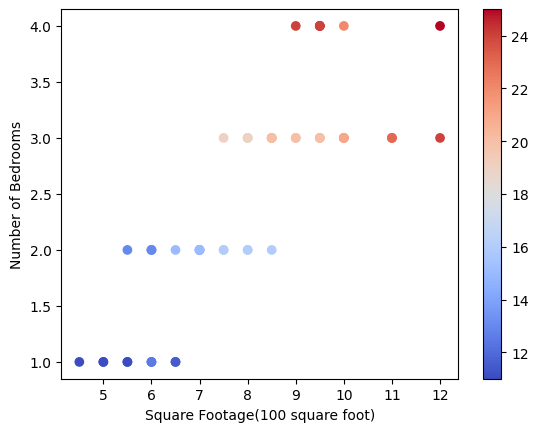

In [141]:
if features_all.shape[1] < 3:
    # Assuming target_all contains 0s and 1s for classification
    plt.scatter(features_all[:, 0], features_all[:, 1], c=target_all, cmap='coolwarm')
    plt.xlabel(df.columns[0])
    plt.ylabel(df.columns[1])
    plt.colorbar()  # Show color scale

In [142]:
# Train the linear regression model
alpha = 0.00007
num_iterations = 100000
w, b, cost_history = train_linear_regression(features, target, alpha, num_iterations)

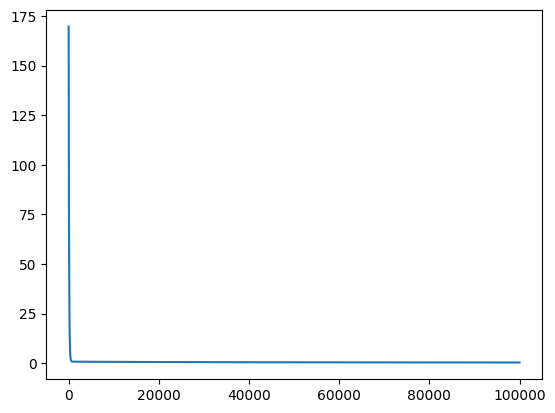

In [143]:
# Plot the cost function over iterations
plt.plot(range(num_iterations), cost_history)

In [144]:
print("Final cost:", cost_history[-1], ", Weights:", w, ", Bias:", b) # Final cost, weights and bias

Final cost: 0.40694158577751904 , Weights: [1.50677649 2.00266649] , Bias: 0.7535642858382506


In [145]:
def predict(x, w, b):
    return hypothesis(x, w, b)

In [146]:
# Make predictions on the test set
predictions = predict(features_test, w, b)
predictions, target_test
for i in range(0, len(predictions)-1):
    print(f"Actual: {target_test[i]},  Prediction: {predictions[i]}")

Actual: 13.0,  Prediction: 13.799556179663204
Actual: 24.0,  Prediction: 22.325218617863204
Actual: 11.0,  Prediction: 9.536724960563205
Actual: 22.0,  Prediction: 23.831995103071524
Actual: 16.0,  Prediction: 17.566497392684003
Actual: 15.0,  Prediction: 15.306332664871524
Actual: 18.0,  Prediction: 18.815775641367367


In [147]:
# Calculate accuracy
accuracy = np.mean(predictions/target_test) * 100
accuracy

102.46183643033137